In [1]:
import pandas as pd
Df=pd.read_excel('./Test_20190707.xlsx')

In [13]:
Df.head()

,pos,ratio,pep.pos,CS(Neg.med),ratio_sg,Pvalue_sg,pos_sg,CS(Neg.med)_sg
0,6.0,-0.710155,2,0.060853,-0.611689,0.036385,6.0,0.012278
1,8.0,-0.709190,3,NaN,-0.639023,0.090993,11.0,NaN
2,11.0,-0.707043,4,NaN,-0.739200,0.000957,12.0,NaN
3,14.0,-0.703956,5,NaN,-0.860502,0.001779,12.0,NaN
4,17.0,-0.699914,6,NaN,-0.801786,0.004635,13.0,NaN


In [2]:
Df.loc[:,'pep.pos_sg']=Df.pos_sg/3
Df.loc[:,'ratio_use']=Df.ratio-Df.iloc[0,3]
Df.loc[:,'ratio_sg_use']=Df.ratio_sg-Df.iloc[0,7]

In [19]:
Df.head()

,pos,ratio,pep.pos,CS(Neg.med),ratio_sg,Pvalue_sg,pos_sg,CS(Neg.med)_sg,pep.pos_sg,ratio_use,ratio_sg_use
0,6.0,-0.710155,2,0.060853,-0.611689,0.036385,6.0,0.012278,2.000000,-0.771008,-0.623967
1,8.0,-0.709190,3,NaN,-0.639023,0.090993,11.0,NaN,3.666667,-0.770043,-0.651301
2,11.0,-0.707043,4,NaN,-0.739200,0.000957,12.0,NaN,4.000000,-0.767896,-0.751478
3,14.0,-0.703956,5,NaN,-0.860502,0.001779,12.0,NaN,4.000000,-0.764809,-0.872779
4,17.0,-0.699914,6,NaN,-0.801786,0.004635,13.0,NaN,4.333333,-0.760767,-0.814064


In [ ]:
sns.s

In [36]:
len(range(1,10))

9

In [48]:
a=[1,10]

In [49]:
Df.loc[:,'ratio_sg_use'][a[0]:a[1]]

1   -0.651301
2   -0.751478
3   -0.872779
4   -0.814064
5   -0.708099
6   -0.584715
7   -0.648423
8   -0.724510
9   -0.556090
Name: ratio_sg_use, dtype: float64

In [5]:
list(zip([1,2,3],[4,5,6]))

[(1, 4), (2, 5), (3, 6)]

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
def NearestValues(x,R_Right,R_Left):
    x_a=np.array(x)
    x_x_a[(x>=R_Left)& (x<=R_Right)]
def BreakXaxis(x1,x2,y1,y2,xrange1,xrange2,SavePNG_Path='./ScatterPlot.png'):
    
    f,(ax,ax2) = plt.subplots(1,2,sharey=True, facecolor='w',
                              figsize=(20,10),
                              gridspec_kw={'width_ratios': [len(range(*xrange1)),
                                                            len(range(*xrange2))]})
    x1_r1,y1_r1=zip(*[(x,y) for x,y in zip(x1,y1) if (xrange1[0]-5<=x) and (x<=xrange1[1])])# 
    x1_r2,y1_r2=zip(*[(x,y) for x,y in zip(x1,y1) if (xrange2[0]<=x) and (x<=xrange2[1])])
    sns.regplot(x=np.array(x1_r1), 
                y=np.array(y1_r1),
                ax=ax,color='red')
#     ax.scatter(x=x1, y=y1)
    ax.scatter(x=x2, y=y2)
#     ax2.scatter(x=x1, y=y1)
    sns.regplot(x=np.array(x1_r2), 
                y=np.array(y1_r2),
                ax=ax2,color='red')
    ax2.scatter(x=x2, y=y2)
    
    ax.set_xlim(*xrange1)
    ax2.set_xlim(*xrange2)

    # hide the spines between ax and ax2
    ax.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax.yaxis.tick_left()
    ax.tick_params(labelright=False)
    ax2.yaxis.tick_right()
    d = .015 # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((1-d,1+d), (-d,+d), **kwargs)
    ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d,+d), (1-d,1+d), **kwargs)
    ax2.plot((-d,+d), (-d,+d), **kwargs)

    # What's cool about this is that now if we vary the distance between
    # ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
    # the diagonal lines will move accordingly, and stay right at the tips
    # of the spines they are 'breaking'
    plt.savefig(SavePNG_Path)
    plt.show()


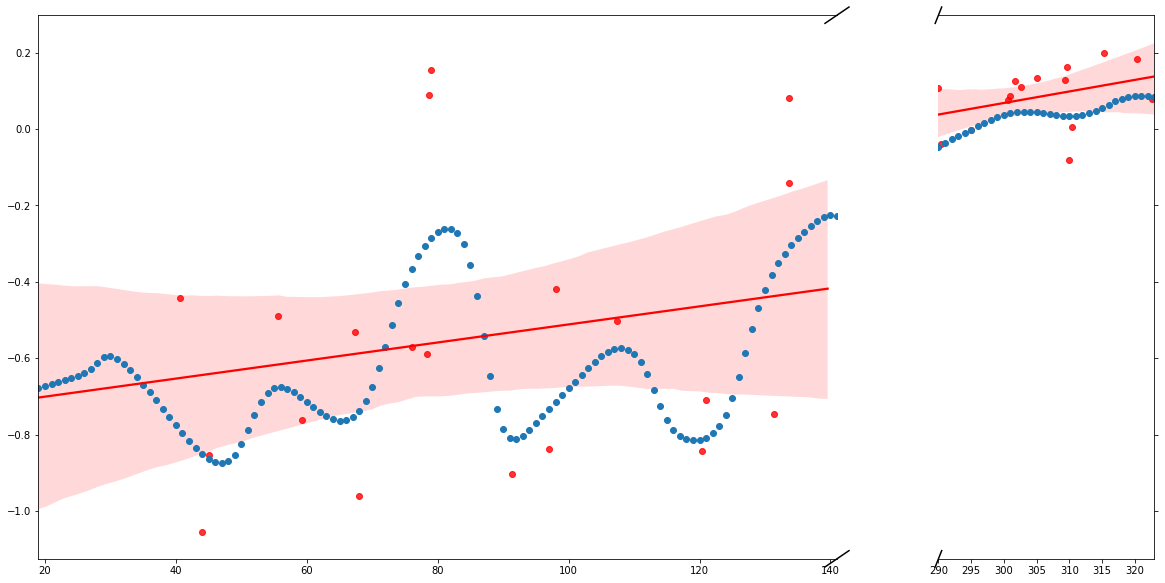

In [22]:
BreakXaxis(x1=Df.loc[:,"pep.pos_sg"],x2=Df.loc[:,"pep.pos"],
           y1=Df.loc[:,"ratio_sg_use"],y2=Df.loc[:,"ratio_use"],
           xrange1=(19,141),xrange2=(290,323),
           SavePNG_Path='./ScatterPlot.png')